In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras.regularizers import l2

# Artificial Neural Networks (ANNs) Tuning

In [3]:
df = pd.read_csv('/churn_dataset.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
Y = df["Churn"]
X = df.drop(['Churn'], axis=1)
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

In [33]:
def DL_Model(activation= 'relu', neurons= 500, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= 23, activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

In [35]:
model = DL_Model()
model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs=7)

Epoch 1/7
165/165 [==============================] - 3s 13ms/step - loss: 0.4530 - accuracy: 0.7797 - val_loss: 0.4296 - val_accuracy: 0.8015
Epoch 2/7
165/165 [==============================] - 2s 12ms/step - loss: 0.4285 - accuracy: 0.7933 - val_loss: 0.4488 - val_accuracy: 0.8003
Epoch 3/7
165/165 [==============================] - 2s 12ms/step - loss: 0.4210 - accuracy: 0.8058 - val_loss: 0.4344 - val_accuracy: 0.8060
Epoch 4/7
165/165 [==============================] - 2s 12ms/step - loss: 0.4167 - accuracy: 0.7992 - val_loss: 0.4251 - val_accuracy: 0.8026
Epoch 5/7
165/165 [==============================] - 2s 11ms/step - loss: 0.4091 - accuracy: 0.8106 - val_loss: 0.4501 - val_accuracy: 0.7981
Epoch 6/7
165/165 [==============================] - 2s 11ms/step - loss: 0.4029 - accuracy: 0.8119 - val_loss: 0.4525 - val_accuracy: 0.8026
Epoch 7/7
165/165 [==============================] - 2s 12ms/step - loss: 0.3963 - accuracy: 0.8151 - val_loss: 0.4520 - val_accuracy: 0.8009


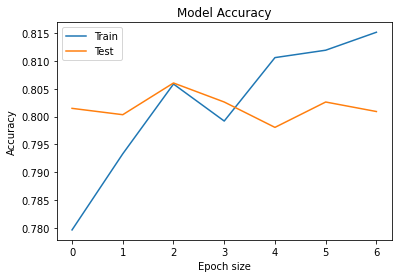

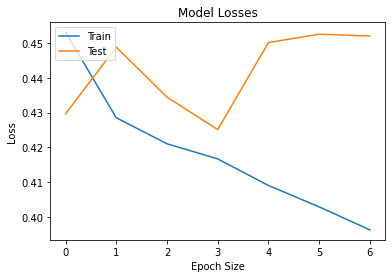

In [36]:
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch size")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Losses")
plt.ylabel("Loss")
plt.xlabel("Epoch Size")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()